<a href="https://colab.research.google.com/github/JeremyBourdier/RH-PARGIRH/blob/main/Jeremy_RD_15_Grupo_3_RH_PARGIHT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación y Entendimiento de Datos (Wrangling & EDA)

#Jeremy ⏬



In [ ]:
!ls

sample_data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url_cruda_precipitation = 'https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/precipitation.csv'

print(f"Inicio Paso 1: Carga de datos desde: {url_cruda_precipitation}")

try:
    df_crudo = pd.read_csv(url_cruda_precipitation)

    print("Exito! Data cruda recibida. Muestra:")
    print(df_crudo.iloc[:5, :5])

except Exception as e:
    print(f"ERROR en Paso 1")
    print(f"No se pudo cargar la data. Error: {e}")

Inicio Paso 1: Carga de datos desde: https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/precipitation.csv
Exito! Data cruda recibida. Muestra:
  metadata/apiVersion metadata/status  metadata/messages  \
0                  v1         success                NaN   

   data/cdd/DOM/1950-01  data/cdd/DOM/1950-02  
0                 11.95                 13.12  


In [ ]:
print("Inicio Paso 2: Analisis Estructural")

# Dimensiones (filas, columnas)
print("Dimensiones de la Data Cruda:")
print(f"Filas: {df_crudo.shape[0]}")
print(f"Columnas: {df_crudo.shape[1]}")

# Nombres de las primeras 10 columnas
print("Nombres de Columna (10 primeros):")
print(list(df_crudo.columns[:10]))

# Resumen tecnico
print("Resumen Tecnico (info):")
df_crudo.info()

Inicio Paso 2: Analisis Estructural
Dimensiones de la Data Cruda:
Filas: 1
Columnas: 2667
Nombres de Columna (10 primeros):
['metadata/apiVersion', 'metadata/status', 'metadata/messages', 'data/cdd/DOM/1950-01', 'data/cdd/DOM/1950-02', 'data/cdd/DOM/1950-03', 'data/cdd/DOM/1950-04', 'data/cdd/DOM/1950-05', 'data/cdd/DOM/1950-06', 'data/cdd/DOM/1950-07']
Resumen Tecnico (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 2667 entries, metadata/apiVersion to data/rx5day/DOM/2023-12
dtypes: float64(2632), int64(33), object(2)
memory usage: 21.0+ KB


In [ ]:
print("Inicio Paso 3: Limpieza y Transformacion")

# Eliminar las columnas de metadatos
columnas_metadatos = ['metadata/apiVersion', 'metadata/status', 'metadata/messages']
df_sin_metadata = df_crudo.drop(columns=columnas_metadatos)

# Transformar TODAS las columnas a formato largo
df_largo_completo = df_sin_metadata.melt(var_name='variable_fecha', value_name='valor')

# Dividir la columna 'variable_fecha'
partes = df_largo_completo['variable_fecha'].str.split('/', expand=True)
df_largo_completo['variable'] = partes[1]
df_largo_completo['fecha'] = partes[3]

# Seleccionar las columnas finales
df_precipitacion_procesado = df_largo_completo[['fecha', 'variable', 'valor']]

# Mostrar una muestra
print("Exito! Data procesada. Muestra visual:")
print(df_precipitacion_procesado.head())

print("Variables procesadas:")
print(df_precipitacion_procesado['variable'].unique())

Inicio Paso 3: Limpieza y Transformacion
Exito! Data procesada. Muestra visual:
     fecha variable  valor
0  1950-01      cdd  11.95
1  1950-02      cdd  13.12
2  1950-03      cdd  16.75
3  1950-04      cdd   9.39
4  1950-05      cdd   5.99
Variables procesadas:
['cdd' 'pr' 'rx5day']


In [ ]:
df_crudo = pd.read_csv(url_cruda_precipitation)

# Columnas de datos
columnas_de_datos = df_crudo.columns[3:]

# Encontrar los prefijos de variables unicos (la 2da parte)
variables_encontradas = set(col.split('/')[1] for col in columnas_de_datos)

print("Las variables encontradas en el archivo son:")
print(variables_encontradas)

Las variables encontradas en el archivo son:
{'rx5day', 'cdd', 'pr'}


In [ ]:
print("Inicio Paso 4: Procesamiento de Fechas")

# Copiar el dataframe
df_final_precipitacion = df_precipitacion_procesado.copy()

# Convertir 'fecha' a objeto datetime
df_final_precipitacion['fecha'] = pd.to_datetime(df_final_precipitacion['fecha'], format='%Y-%m')

# Establecer 'fecha' como el indice
df_final_precipitacion = df_final_precipitacion.set_index('fecha')

# Mostrar el resultado
print("Exito! DataFrame final con indice de tiempo. Muestra visual:")
print(df_final_precipitacion.head())

print("Resumen tecnico final (info):")
df_final_precipitacion.info()

Inicio Paso 4: Procesamiento de Fechas
Exito! DataFrame final con indice de tiempo. Muestra visual:
           variable  valor
fecha                     
1950-01-01      cdd  11.95
1950-02-01      cdd  13.12
1950-03-01      cdd  16.75
1950-04-01      cdd   9.39
1950-05-01      cdd   5.99
Resumen tecnico final (info):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2664 entries, 1950-01-01 to 2023-12-01
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variable  2664 non-null   object 
 1   valor     2664 non-null   float64
dtypes: float64(1), object(1)
memory usage: 62.4+ KB


In [ ]:
print("Inicio EDA: Reestructuracion y Estadisticas")

# Pivotar el DataFrame (variable por columna)
df_eda_precipitacion = df_final_precipitacion.pivot_table(index='fecha', columns='variable', values='valor')

# Muestra del nuevo DataFrame
print("Muestra del DataFrame EDA:")
print(df_eda_precipitacion.head())

# Estadisticas descriptivas
print("Estadisticas Descriptivas:")
print(df_eda_precipitacion.describe())

Inicio EDA: Reestructuracion y Estadisticas
Muestra del DataFrame EDA:
variable      cdd      pr  rx5day
fecha                            
1950-01-01  11.95   52.34   15.19
1950-02-01  13.12   60.15   32.48
1950-03-01  16.75   23.55   13.75
1950-04-01   9.39   87.36   39.60
1950-05-01   5.99  149.57   66.53
Estadisticas Descriptivas:
variable         cdd          pr      rx5day
count     888.000000  888.000000  888.000000
mean        7.381926   90.834606   40.430383
std         3.840405   51.874584   24.124669
min         1.060000   14.590000    6.800000
25%         4.367500   51.745000   23.810000
50%         6.195000   83.280000   35.430000
75%         9.792500  117.880000   51.562500
max        21.530000  324.770000  170.620000


In [ ]:
display(df_eda_precipitacion)

variable,cdd,pr,rx5day
fecha,,,
1950-01-01,11.95,52.34,15.19
1950-02-01,13.12,60.15,32.48
1950-03-01,16.75,23.55,13.75
1950-04-01,9.39,87.36,39.60
1950-05-01,5.99,149.57,66.53
1950-06-01,5.14,115.45,61.56
1950-07-01,5.66,76.47,29.11
1950-08-01,6.27,172.11,72.70
1950-09-01,3.10,127.25,41.30


Inicio EDA: Visualizacion de Series de Tiempo
Grafico 'eda_series_de_tiempo.png' generado.


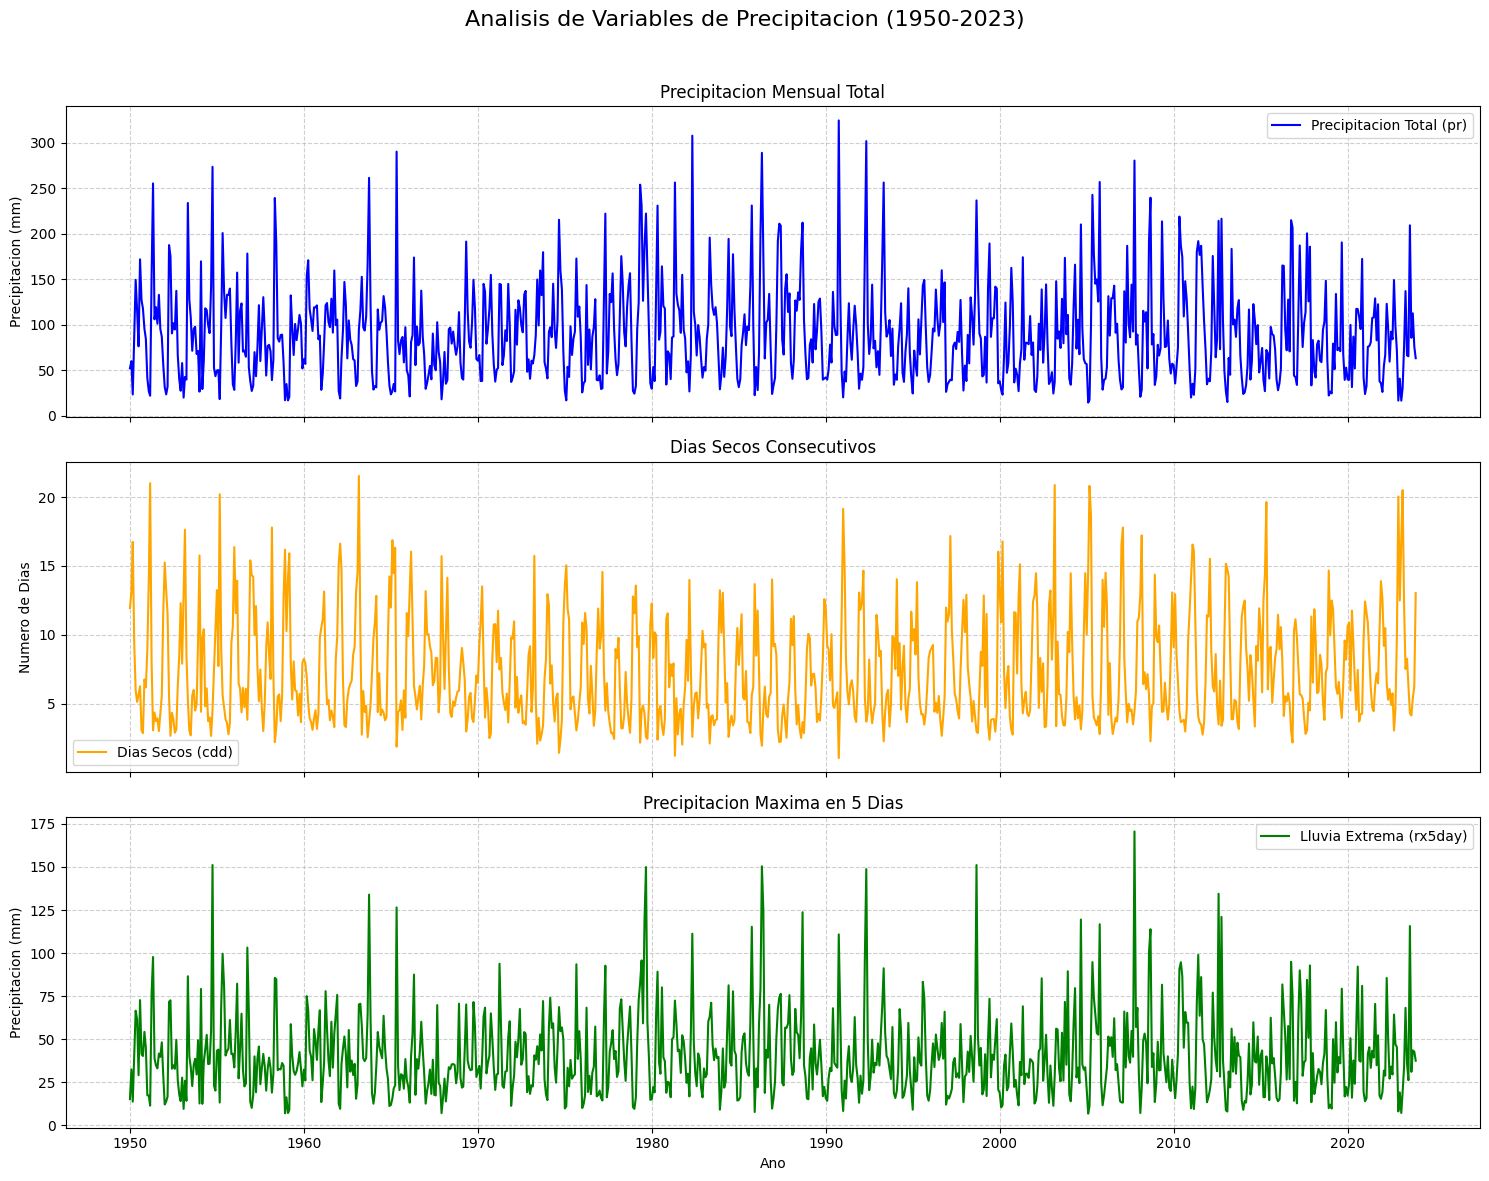

In [ ]:
import matplotlib.pyplot as plt

print("Inicio EDA: Visualizacion de Series de Tiempo")

# Crear figura con 3 subplots verticales.
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle('Analisis de Variables de Precipitacion (1950-2023)', fontsize=16)

# Grafico de Precipitacion Total (pr)
axes[0].plot(df_eda_precipitacion.index, df_eda_precipitacion['pr'], color='blue', label='Precipitacion Total (pr)')
axes[0].set_ylabel('Precipitacion (mm)')
axes[0].set_title('Precipitacion Mensual Total')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

# Grafico de Dias Secos Consecutivos (cdd)
axes[1].plot(df_eda_precipitacion.index, df_eda_precipitacion['cdd'], color='orange', label='Dias Secos (cdd)')
axes[1].set_ylabel('Numero de Dias')
axes[1].set_title('Dias Secos Consecutivos')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

# Grafico de Precipitacion Maxima en 5 Dias (rx5day)
axes[2].plot(df_eda_precipitacion.index, df_eda_precipitacion['rx5day'], color='green', label='Lluvia Extrema (rx5day)')
axes[2].set_ylabel('Precipitacion (mm)')
axes[2].set_title('Precipitacion Maxima en 5 Dias')
axes[2].set_xlabel('Ano')
axes[2].grid(True, linestyle='--', alpha=0.6)
axes[2].legend()

# Ajustar y guardar la figura
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('eda_series_de_tiempo.png')

print("Grafico 'eda_series_de_tiempo.png' generado.")

#Jeremy ⏫


In [ ]:
url_cruda_temperatura = 'https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/temperatura.csv'

print(f"Intentando extraer datos crudos desde:\n{url_cruda_temperatura}\n")

try:
    df_crudo_temp = pd.read_csv(url_cruda_temperatura)

    print("bien")
    print(df_crudo_temp.iloc[:5, :5])

except Exception as e:
    print(f"No se pudo extraer la data. El error fue: {e}")

Intentando extraer datos crudos desde:
https://raw.githubusercontent.com/JeremyBourdier/RH-PARGIRH/main/temperatura.csv

bien
  metadata/apiVersion metadata/status  metadata/messages  \
0                  v1         success                NaN   

   data/tas/DOM/1950-01  data/tas/DOM/1950-02  
0                 20.69                    21  


In [ ]:
# Analisis Estructural df_crudo_temp

print("Dimension del dataset")
print(df_crudo_temp.shape)

print("\nInformacion de las columnas")
print(df_crudo_temp.info())

print("\nNombres de las primeras 10 columnas")
print(df_crudo_temp.columns[:10])

Dimension del dataset
(1, 2667)

Informacion de las columnas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 2667 entries, metadata/apiVersion to data/tasmin/DOM/2023-12
dtypes: float64(2630), int64(35), object(2)
memory usage: 21.0+ KB
None

Nombres de las primeras 10 columnas
Index(['metadata/apiVersion', 'metadata/status', 'metadata/messages',
       'data/tas/DOM/1950-01', 'data/tas/DOM/1950-02', 'data/tas/DOM/1950-03',
       'data/tas/DOM/1950-04', 'data/tas/DOM/1950-05', 'data/tas/DOM/1950-06',
       'data/tas/DOM/1950-07'],
      dtype='object')


In [31]:
# Ignorar las primeras columnas de metadatos
columnas_de_datos = df_crudo_temp.columns[3:]

# Extraer la segunda parte de cada nombre de columna
# Se usa un set para obtener solo los valores unicos
variables_encontradas = set([col.split('/')[1] for col in columnas_de_datos])

print("Variables unicas encontradas en el archivo:")
print(list(variables_encontradas))

Variables unicas encontradas en el archivo:
['tasmax', 'tasmin', 'tas']


In [33]:
# Limpieza y Transformacion de Datos de Temperatura

print("Iniciando limpieza y transformacion de df_crudo_temp")

# 1. Quitar metadatos
columnas_a_eliminar_temp = ['metadata/apiVersion', 'metadata/status', 'metadata/messages']
df_sin_metadata_temp = df_crudo_temp.drop(columns=columnas_a_eliminar_temp)

# 2. Transformar de ancho a largo (Unpivot)
df_largo_temp = df_sin_metadata_temp.melt(var_name='variable_fecha', value_name='valor')

# 3. Extraer variable y fecha
partes_temp = df_largo_temp['variable_fecha'].str.split('/', expand=True)
df_largo_temp['variable'] = partes_temp[1]
df_largo_temp['fecha'] = partes_temp[3]

# 4. Limpiar y seleccionar columnas
df_final_temperatura = df_largo_temp[['fecha', 'variable', 'valor']].copy()
df_final_temperatura['fecha'] = pd.to_datetime(df_final_temperatura['fecha'], format='%Y-%m')

# 5. Pivotar para crear el DataFrame final de EDA
df_eda_temperatura = df_final_temperatura.pivot_table(index='fecha', columns='variable', values='valor')

print("\nProceso completado.")
print("Mostrando el DataFrame de temperatura limpio y estructurado:")
display(df_eda_temperatura)

Iniciando limpieza y transformacion de df_crudo_temp

Proceso completado.
Mostrando el DataFrame de temperatura limpio y estructurado:


variable,tas,tasmax,tasmin
fecha,,,
1950-01-01,20.69,24.90,17.61
1950-02-01,21.00,25.30,17.71
1950-03-01,22.35,26.95,18.77
1950-04-01,22.46,26.53,19.30
1950-05-01,23.39,27.38,20.16
...,...,...,...
2023-08-01,26.71,30.91,23.81
2023-09-01,26.73,30.97,23.64
2023-10-01,26.27,30.33,23.34


In [34]:
print("Dimensiones del DataFrame df_eda_temperatura:")
print(df_eda_temperatura.shape)

print("\nResumen técnico del DataFrame df_eda_temperatura:")
df_eda_temperatura.info()

Dimensiones del DataFrame df_eda_temperatura:
(888, 3)

Resumen técnico del DataFrame df_eda_temperatura:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 888 entries, 1950-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tas     888 non-null    float64
 1   tasmax  888 non-null    float64
 2   tasmin  888 non-null    float64
dtypes: float64(3)
memory usage: 27.8 KB


In [38]:
print("Estadisticas Descriptivas de las Variables de Temperatura:")
display(df_eda_temperatura.describe())

Estadisticas Descriptivas de las Variables de Temperatura:


variable,tas,tasmax,tasmin
count,888.000000,888.000000,888.000000
mean,23.883953,27.962872,20.615236
std,1.320840,1.338750,1.400775
min,20.470000,24.340000,16.440000
25%,22.797500,26.907500,19.440000
50%,24.030000,27.995000,20.900000
75%,24.990000,29.020000,21.732500
max,26.970000,31.260000,23.830000


Generando grafico de las series de tiempo de temperatura...


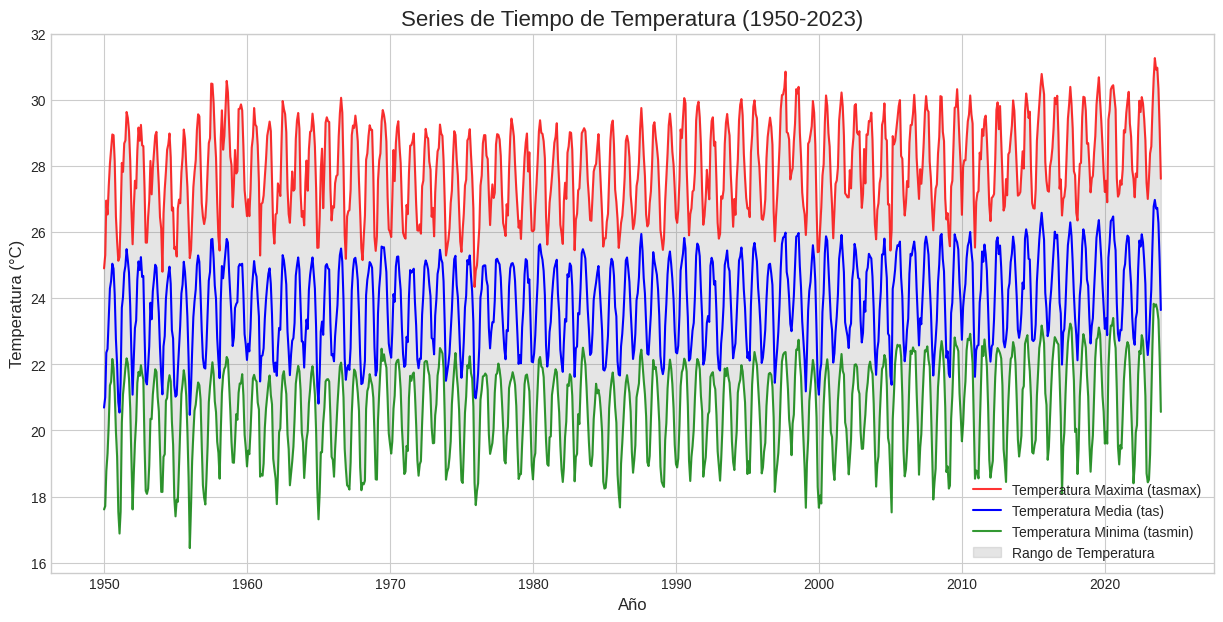

In [39]:
# Visualizacion de Series de Tiempo de Temperatura ---

import matplotlib.pyplot as plt

print("Generando grafico de las series de tiempo de temperatura...")

# Preparar la figura para el grafico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 7))

# Graficar cada variable de temperatura
ax.plot(df_eda_temperatura.index, df_eda_temperatura['tasmax'], label='Temperatura Maxima (tasmax)', color='red', alpha=0.8)
ax.plot(df_eda_temperatura.index, df_eda_temperatura['tas'], label='Temperatura Media (tas)', color='blue')
ax.plot(df_eda_temperatura.index, df_eda_temperatura['tasmin'], label='Temperatura Minima (tasmin)', color='green', alpha=0.8)

# Rellenar el area entre max y min para visualizacion
ax.fill_between(df_eda_temperatura.index, df_eda_temperatura['tasmin'], df_eda_temperatura['tasmax'], color='gray', alpha=0.2, label='Rango de Temperatura')

# Anadir titulos y etiquetas
ax.set_title('Series de Tiempo de Temperatura (1950-2023)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Temperatura (°C)', fontsize=12)
ax.legend()

# Mostrar el grafico
plt.show()

In [40]:
#  Calculo de Promedios Anuales de Temperatura

# Agrupar por ano y calcular la media para cada variable
df_anual_temp = df_eda_temperatura.resample('YE').mean()

print("Calculo de promedios anuales completado.")
print("Mostrando los promedios anuales de temperatura:")
display(df_anual_temp.head())

Calculo de promedios anuales completado.
Mostrando los promedios anuales de temperatura:


variable,tas,tasmax,tasmin
fecha,,,
1950-12-31,23.126667,27.154167,20.060000
1951-12-31,23.489167,27.763333,20.185000
1952-12-31,23.598333,27.758333,20.335833
1953-12-31,23.501667,27.559167,20.257500
1954-12-31,23.148333,27.154167,19.917500


Generando grafico de la tendencia anual de temperatura...


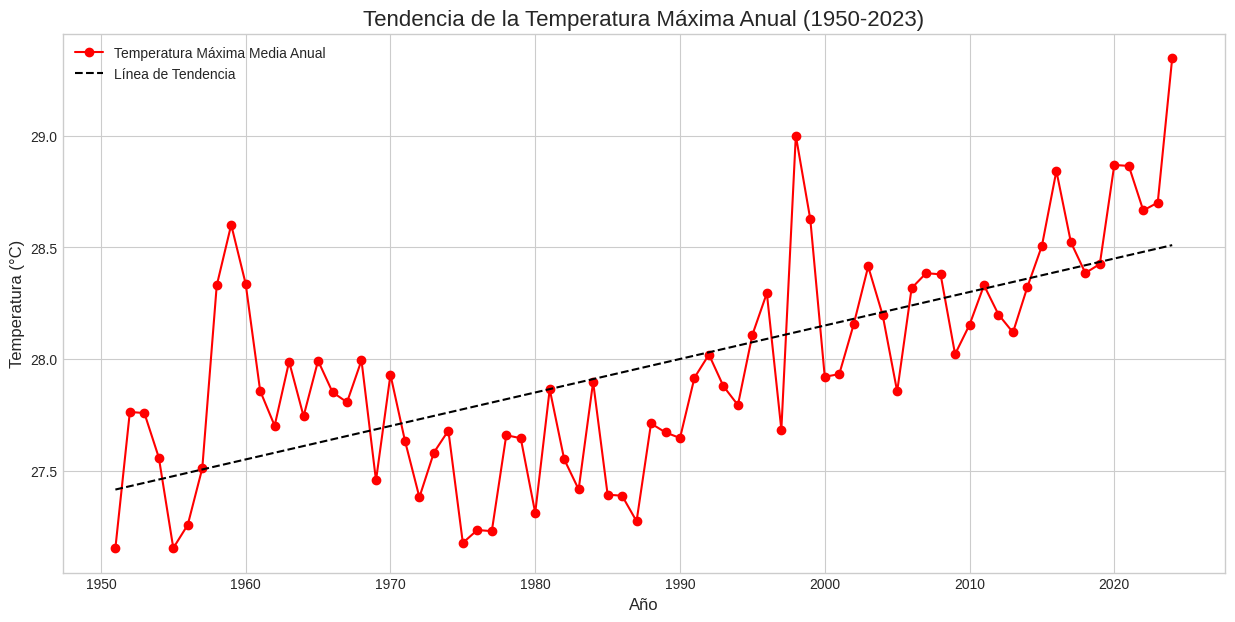

In [41]:
#  Visualizacion de la Tendencia Anual de Temperatura

import matplotlib.pyplot as plt
import numpy as np

print("Generando grafico de la tendencia anual de temperatura...")

# Preparar la figura para el grafico
fig, ax = plt.subplots(figsize=(15, 7))

# Graficar la serie de tiempo de la temperatura maxima anual
ax.plot(df_anual_temp.index, df_anual_temp['tasmax'], label='Temperatura Máxima Media Anual', color='red', marker='o', linestyle='-')

# Calcular y graficar la linea de tendencia (regresion lineal)
x = np.arange(len(df_anual_temp.index))
y = df_anual_temp['tasmax']
m, b = np.polyfit(x, y, 1)
ax.plot(df_anual_temp.index, m*x + b, label='Línea de Tendencia', color='black', linestyle='--')

# Anadir titulos y etiquetas
ax.set_title('Tendencia de la Temperatura Máxima Anual (1950-2023)', fontsize=16)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Temperatura (°C)', fontsize=12)
ax.legend()
ax.grid(True)

# Mostrar el grafico
plt.show()

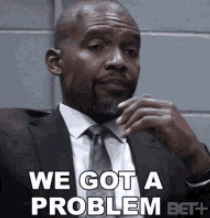

In [43]:
#Fase 3: Integracion de Datos Climaticos

print("Uniendo los DataFrames de precipitacion y temperatura...")

# Unir los dos DataFrames limpios usando su indice de fecha comun
df_climatico = df_eda_precipitacion.join(df_eda_temperatura)

print("\nIntegracion completada.")
print("Mostrando una muestra del DataFrame climatico unificado:")

# Mostrar las primeras filas para verificar la union
display(df_climatico.head())

# Verificar la estructura del nuevo DataFrame
print("\nVerificando la estructura final del DataFrame unificado:")
df_climatico.info()

Uniendo los DataFrames de precipitacion y temperatura...

Integracion completada.
Mostrando una muestra del DataFrame climatico unificado:


variable,cdd,pr,rx5day,tas,tasmax,tasmin
fecha,,,,,,
1950-01-01,11.95,52.34,15.19,20.69,24.90,17.61
1950-02-01,13.12,60.15,32.48,21.00,25.30,17.71
1950-03-01,16.75,23.55,13.75,22.35,26.95,18.77
1950-04-01,9.39,87.36,39.60,22.46,26.53,19.30
1950-05-01,5.99,149.57,66.53,23.39,27.38,20.16



Verificando la estructura final del DataFrame unificado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 888 entries, 1950-01-01 to 2023-12-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cdd     888 non-null    float64
 1   pr      888 non-null    float64
 2   rx5day  888 non-null    float64
 3   tas     888 non-null    float64
 4   tasmax  888 non-null    float64
 5   tasmin  888 non-null    float64
dtypes: float64(6)
memory usage: 48.6 KB


In [45]:
#Guardar el DataFrame Unificado

# Nombre del archivo de salida
nombre_archivo_salida = 'datos_climaticos_unificados.csv'

# Guardar df_climatico a un archivo CSV
df_climatico.to_csv(nombre_archivo_salida)

print(f"DataFrame unificado guardado exitosamente como '{nombre_archivo_salida}'")

DataFrame unificado guardado exitosamente como 'datos_climaticos_unificados.csv'
